In [1]:
import numpy as np
import requests

from io import BytesIO
from matplotlib.pyplot import imshow
from PIL import Image

In [2]:
URL = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?SERVICE=WMS&REQUEST=GetMap&layers=MODIS_Aqua_CorrectedReflectance_TrueColor&version=1.3.0&crs=EPSG:4326&transparent=false&width={}&height={}&bbox={}&format=image/tiff&time={}"
KM_PER_DEG_AT_EQ = 111.

##### Note: Be careful with the resolution and extent. higher resolution with bigger extent images will be huge and probably not load. For the dataset we have 0.25 might be more than enough.

In [3]:
def calculate_width_height(extent, resolution):
    """
    extent: [lower_latitude, left_longitude, higher_latitude, right_longitude], EG: [51.46162974683544,-22.94768591772153,53.03698575949367,-20.952234968354432]
    resolution: represents the pixel resolution, i.e. km/pixel. Should be a value from this list: [0.03, 0.06, 0.125, 0.25, 0.5, 1, 5, 10]
    """
    lats = extent[::2]
    lons = extent[1::2]
    km_per_deg_at_lat = KM_PER_DEG_AT_EQ * np.cos(np.pi * np.mean(lats) / 180.)
    width = int((lons[1] - lons[0]) * km_per_deg_at_lat / resolution)
    height = int((lats[1] - lats[0]) * KM_PER_DEG_AT_EQ / resolution)
    print(width, height)
    return (width, height)


In [4]:
def modis_url(time, extent, resolution):
    """
    time: utc time in iso format EG: 2020-02-19T00:00:00Z
    extent: [lower_latitude, left_longitude, higher_latitude, right_longitude], EG: [51.46162974683544,-22.94768591772153,53.03698575949367,-20.952234968354432]
    resolution: represents the pixel resolution, i.e. km/pixel. Should be a value from this list: [0.03, 0.06, 0.125, 0.25, 0.5, 1, 5, 10]
    """
    width, height = calculate_width_height(extent, resolution)
    extent = ','.join(map(lambda x: str(x), extent))
    return (width, height, URL.format(width, height, extent, time))


In [5]:
width, height, url = modis_url('2020-02-17T00:00:00Z', [51.46162974683544,-22.94768591772153,53.03698575949367,-20.952234968354432], 0.25)

542 699


In [6]:
response = requests.get(url)
img = BytesIO(response.content)

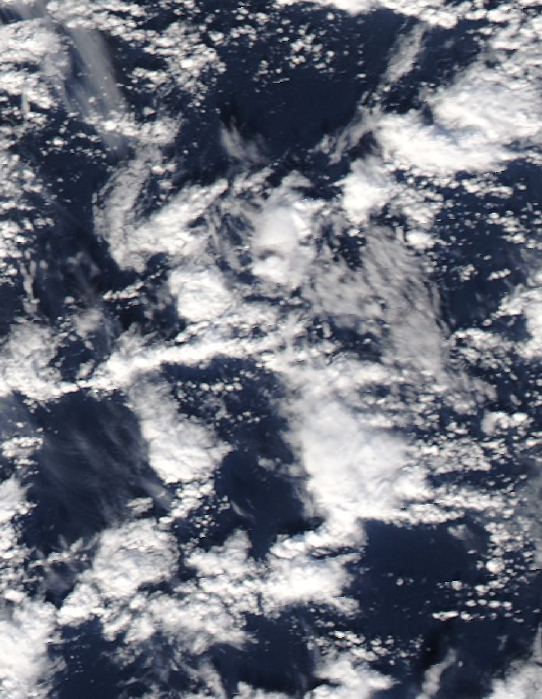

In [7]:
Image.open(img)